In [11]:
!pip install geopandas matplotlib shapely contextily




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\spenc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd



df = pd.read_csv('National_parks_with_float_coors.csv')
final_df = df
print(final_df.columns)

Index(['Incident Date', 'Park Name', 'Cause of Death',
       'Cause of Death Group \n(Used in the NPS Mortality Dashboard) ',
       'Intent', 'Outcome', 'Sex', 'Age Range', 'Activity', 'temperature',
       'precipitation', 'humidity', 'date', 'latlong', 'latitude',
       'longitude'],
      dtype='object')


Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)


ValueError: aspect must be finite and positive 

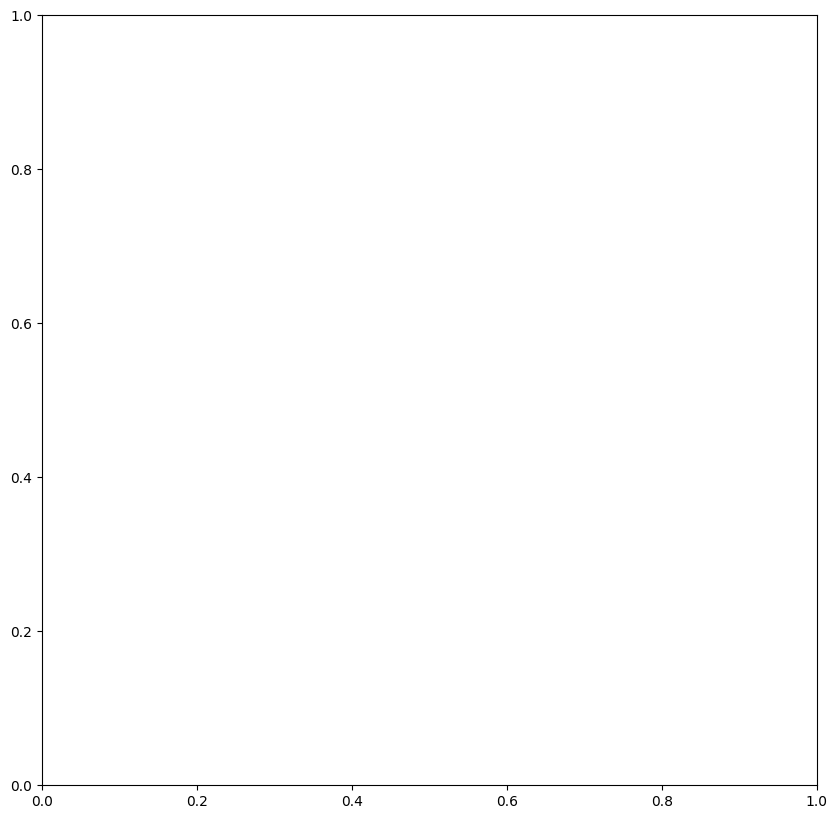

In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load your dataset
# final_df should already contain latitude and longitude columns for each park
final_df = pd.read_csv('national_parks_with_float_coors.csv')

# Create GeoDataFrame from final_df with geometry
geometry = [Point(xy) for xy in zip(final_df['longitude'], final_df['latitude'])]
geo_df = gpd.GeoDataFrame(final_df, geometry=geometry)

# Load the shapefile of the US
shapefile_path = '110m_cultural/ne_110m_admin_1_states_provinces.shp'  # Update this path as necessary
us_map = gpd.read_file(shapefile_path)

# Check available columns in us_map
print(us_map.columns)

# Replace 'NAME' with the actual column name you find, e.g., 'admin'
us_map = us_map[us_map['admin'] == 'United States']  # Replace 'admin' with the correct name

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
us_map.plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, marker='o', color='red', markersize=geo_df['deaths']*10, alpha=0.5)  # Adjust size based on deaths

plt.title('Deaths in National Parks by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


GeoDataFrame CRS:
EPSG:4326
US Map CRS:
EPSG:4326


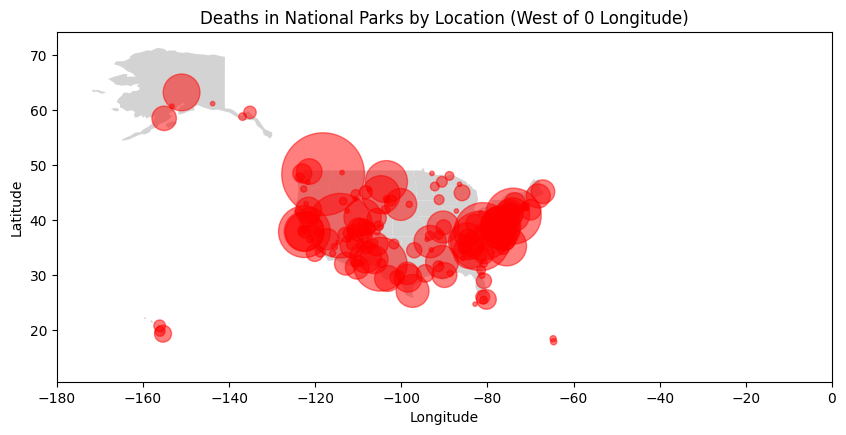

In [29]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load your dataset
final_df = pd.read_csv('national_parks_with_float_coors.csv')
# Aggregate data by park name
aggregated_df = final_df.groupby('Park Name').size().reset_index(name='deaths')  # Count the number of deaths

# If you have latitude and longitude in the final_df, you can get them like this:
# Assuming final_df has columns 'latitude' and 'longitude'
aggregated_df['latitude'] = final_df.groupby('Park Name')['latitude'].mean().values
aggregated_df['longitude'] = final_df.groupby('Park Name')['longitude'].mean().values

# Create GeoDataFrame from aggregated_df with geometry
geometry = [Point(xy) for xy in zip(aggregated_df['longitude'], aggregated_df['latitude'])]
geo_df = gpd.GeoDataFrame(aggregated_df, geometry=geometry)

# Set the CRS for geo_df
geo_df.set_crs(epsg=4326, inplace=True)  # Set geo_df CRS to WGS 84

# Load the shapefile of the US
shapefile_path = '110m_cultural/ne_110m_admin_1_states_provinces.shp'  # Update this path as necessary
us_map = gpd.read_file(shapefile_path)

# Check the CRS
print("GeoDataFrame CRS:")
print(geo_df.crs)
print("US Map CRS:")
print(us_map.crs)

# Plotting
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
us_map.plot(ax=ax, color='lightgrey')

# Use the 'deaths' column to set the size of the markers
geo_df.plot(ax=ax, marker='o', color='red', markersize=geo_df['deaths'] * 10, alpha=0.5)

# Set limits for the x-axis (longitude) to cut off at 0
ax.set_xlim(left=-180, right=0)  # Adjusting x-axis to show only west of 0 longitude

plt.title('Deaths in National Parks by Location (West of 0 Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [23]:
print(geo_df.crs)
print(us_map.crs)


None
EPSG:4326
